In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
metadata_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6zCX7UhgM9Q7O9gp8IaAFwOfotCT7_jSbJc8ab0IY-Pmnf1fNOpVwnAG-Jn_WVdP1XKRHntDxHIBU/pub?gid=101839528&single=true&output=csv"
df = pd.read_csv(metadata_url)

/tmp/ipykernel_20778/3587115739.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(["No", "Yes"])


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

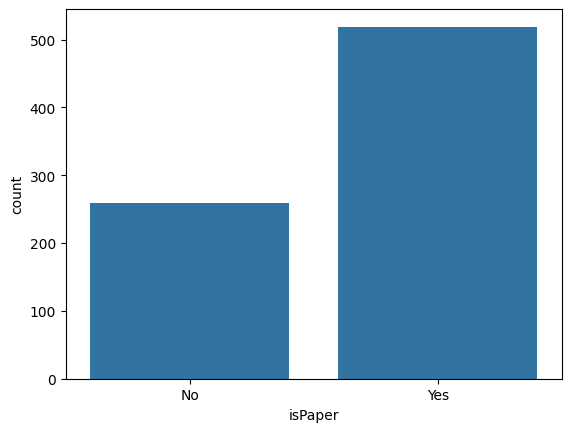

In [8]:
sns.countplot(data=df, x="isPaper")
plt.gca().set_xticklabels(["No", "Yes"])

In [60]:
notpaper = len(df[df["isPaper"] == False])
nohtml = len(df[(df["isPaper"] == True) & (df["hasHtml"]) == False])
platforms = ["IEEE", "Springer", "Nature", "ACM", "Science"]
platforms_cnt = [
    len(df[(df["isPaper"] == True) & (df["hasHtml"] == True) & (df["platform"] == i)])
    for i in platforms
]
others = len(
    df[
        (df["isPaper"] == True)
        & (df["hasHtml"] == True)
        & (~df["platform"].isin(platforms))
    ]
)

In [30]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [66]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

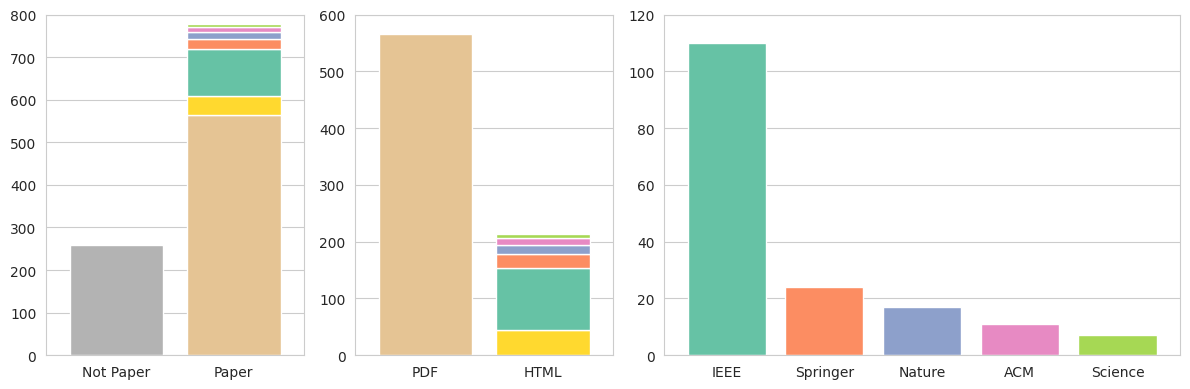

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), width_ratios=[1, 1, 2])
axes[0].bar(
    x=[1],
    height=[notpaper],
    color="C7",
)
cnt = 0
axes[0].bar(x=[2], height=[nohtml], color="C6")
cnt += nohtml
axes[0].bar(x=[2], height=[others], color="C5", bottom=[cnt])
cnt += others
for i in range(len(platforms)):
    axes[0].bar(x=[2], height=[platforms_cnt[i]], color=f"C{i}", bottom=[cnt])
    cnt += platforms_cnt[i]
axes[0].set_ylim(0, 800)
axes[0].set_xlim([0.4, 2.6])
axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["Not Paper", "Paper"])

cnt = 0
axes[1].bar(x=[1], height=[nohtml], color="C6")
axes[1].bar(x=[2], height=[others], color="C5", bottom=[cnt])
cnt += others
for i in range(len(platforms)):
    axes[1].bar(x=[2], height=[platforms_cnt[i]], color=f"C{i}", bottom=[cnt])
    cnt += platforms_cnt[i]
axes[1].set_xlim([0.4, 2.6])
axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(["PDF", "HTML"])
axes[1].set_ylim(0, 600)


axes[2].bar(
    x=range(len(platforms)), height=platforms_cnt, color=sns.color_palette("Set2")
)
axes[2].set_xticks(range(len(platforms)))
axes[2].set_xticklabels(platforms)
axes[2].set_ylim(0, 120)

for ax in axes:
    ax.grid(axis="x")

plt.tight_layout()
plt.savefig("fig.png", dpi=300, transparent=True)
plt.show()